In [2]:
import numpy as np
import pandas as pd

In [3]:
def gbm(n_years = 10, n_scenarios = 1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    
    xi = np.random.normal(size = (n_steps, n_scenarios))
    
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    prices = s_0 * (1+rets).cumprod()
    return prices

In [7]:
p = gbm()

<AxesSubplot:>

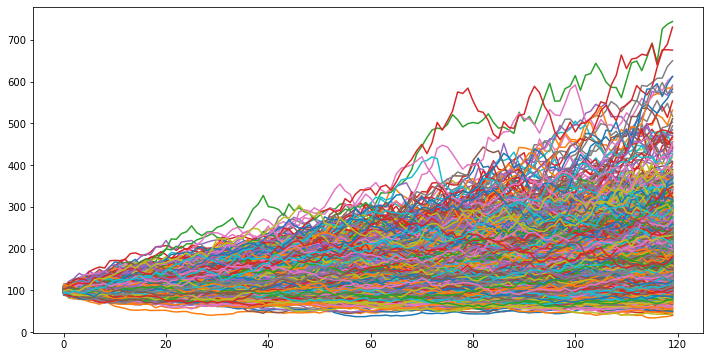

In [10]:
p.plot(figsize = (12,6), legend = False)

In [40]:
def gbm0(n_years = 10, n_scenarios = 1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    
    xi = np.random.normal(size = (n_steps, n_scenarios))
    
    rets = mu*dt + sigma*np.sqrt(dt)*xi # when you multiply a matrix by a scalar, it's technically an embedded loop
    #would be more efficient if we randomized rets directly
    
    rets = pd.DataFrame(rets)
    prices = s_0 * (1+rets).cumprod()
    return prices

def gbm1(n_years = 10, n_scenarios = 1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0 = 100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year)
    rets_plus_one = np.random.normal(loc=(1+mu*dt), scale = (sigma*np.sqrt(dt)), size = (n_steps, n_scenarios))
    rets_plus_one[0] = 1
    prices = s_0 * pd.DataFrame(rets_plus_one).cumprod()
    return prices

In [41]:
%timeit gbm0(50)

21.4 ms ± 484 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%timeit gbm1(50)

18.1 ms ± 513 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot:>

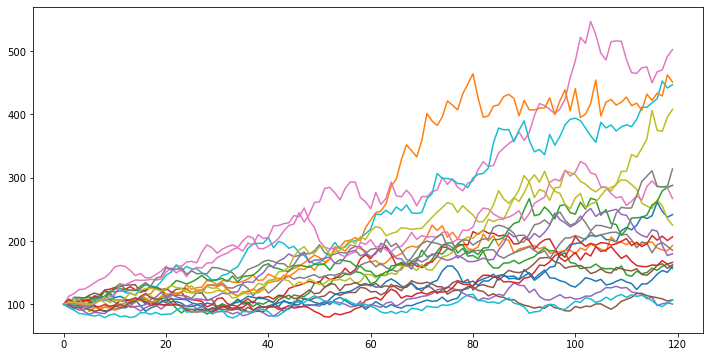

In [43]:
gbm1(10, 20).plot(legend = False, figsize = (12,6))

<AxesSubplot:>

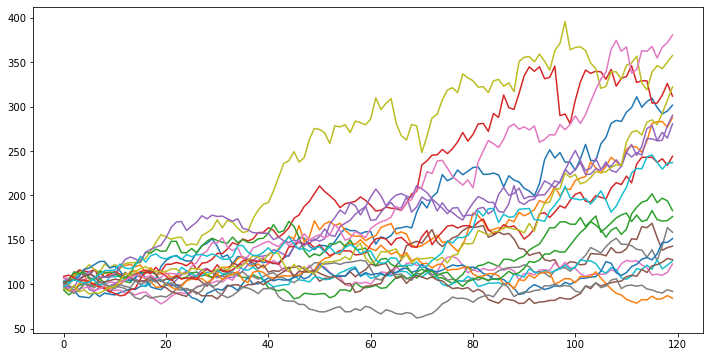

In [44]:
gbm0(10, 20).plot(legend = False, figsize = (12,6))